In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df=df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1)

In [7]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [9]:
df.duplicated().any()

True

In [10]:
df.duplicated().sum()

108

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(51609, 11)

In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
def rateFunction(rate):
    if(rate == 'NEW' or rate == '-'):
        return np.nan
    else:
        rate = str(rate).split('/')
        rate=rate[0]
        return float(rate)
    
df['rate']=df['rate'].apply(rateFunction)

In [15]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [16]:
df.rate.isnull().sum()

10019

In [17]:
df.fillna(df['rate'].mean(),inplace=True)

In [18]:
df.rate.isnull().sum()

0

In [19]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [20]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [21]:
df.rename(columns={'approx_cost(for two people)':'cost-2_people','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost-2_people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [23]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 3.700141861024285, 'CV Raman Nagar',
       'Electronic City', 'HSR', 'Marathahalli', 'Sarjapur Road',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
     

In [24]:
df.drop(['city'],axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost-2_people,type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


In [25]:
df['cost-2_people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', 3.700141861024285,
       '1,400', '180', '1,350', '2,200', '2,000', '1,800', '1,900', '330',
       '2,500', '2,100', '3,000', '2,800', '3,400', '40', '1,250',
       '3,500', '4,000', '2,400', '2,600', '120', '1,450', '469', '70',
       '3,200', '60', '560', '240', '360', '6,000', '1,050', '2,300',
       '4,100', '5,000', '3,700', '1,650', '2,700', '4,500', '140'],
      dtype=object)

In [26]:
def costHandle(cost):
    cost=str(cost)
    if ',' in cost:
        cost=cost.replace(',','')
        return float(cost)
    else:
        return float(cost)

In [27]:
df['cost-2_people'].apply(costHandle)

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: cost-2_people, Length: 51609, dtype: float64

In [28]:
rest_types=df['rest_type'].value_counts()

In [29]:
rest_type_lessthan500 = rest_types[rest_types<500]
rest_type_lessthan500

rest_type
Sweet Shop                    468
Bar, Casual Dining            420
Lounge                        395
Pub                           355
Fine Dining                   345
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Sweet Shop, Dessert Parlor      1
Quick Bites, Kiosk              1
Name: count, Length: 83, dtype: int64

In [30]:
def handleRestTypes(rest_type):
    if(rest_type in rest_type_lessthan500):
        return 'others'
    else:
        return rest_type
    
df['rest_type']=df['rest_type'].apply(handleRestTypes)

In [31]:
df['rest_type'].value_counts()

rest_type
Quick Bites           19096
Casual Dining         10309
others                 7115
Cafe                   3727
Delivery               2600
Dessert Parlor         2260
Takeaway, Delivery     2031
Casual Dining, Bar     1148
Bakery                 1140
Beverage Shop           865
Bar                     697
Food Court              621
Name: count, dtype: int64

In [32]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost-2_people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [33]:
location_value=df['location'].value_counts()

In [34]:
location_value_lessthan200=location_value[location_value<200]

In [35]:
def handleLocation(location):
    if location in location_value_lessthan200:
        return 'others'
    else:
        return location
    
df['location']=df['location'].apply(handleLocation)

In [36]:
df['location'].value_counts()

location
BTM                      5109
others                   3454
HSR                      2521
Koramangala 5th Block    2502
JP Nagar                 2234
Whitefield               2140
Indiranagar              2075
Jayanagar                1926
Marathahalli             1843
Bannerghatta Road        1628
Bellandur                1283
Electronic City          1256
Koramangala 1st Block    1237
Brigade Road             1210
Koramangala 7th Block    1179
Koramangala 6th Block    1154
Sarjapur Road            1063
Ulsoor                   1017
Koramangala 4th Block    1017
MG Road                   917
Banashankari              904
Kalyan Nagar              853
Richmond Road             811
Malleshwaram              722
Frazer Town               720
Basavanagudi              684
Residency Road            672
Banaswadi                 659
Brookefield               658
New BEL Road              649
Kammanahalli              647
Rajajinagar               591
Church Street             566
L

In [37]:
df['cuisines'].value_counts()

cuisines
North Indian                                  2907
North Indian, Chinese                         2381
South Indian                                  1826
Biryani                                        915
Bakery, Desserts                               910
                                              ... 
European, Asian, North Indian                    1
North Indian, Continental, Mughlai, Andhra       1
Fast Food, Ice Cream, Pizza, Desserts            1
Continental, Fast Food, Chinese, Burger          1
North Indian, Chinese, Arabian, Momos            1
Name: count, Length: 2724, dtype: int64

In [38]:
cuisines_value=df['cuisines'].value_counts()

In [39]:
cuisines_value_lessthan100=cuisines_value[cuisines_value<100]

In [40]:
def handleCuisines(cuisines):
    if cuisines in cuisines_value_lessthan100:
        return 'others'
    else:
        return cuisines
    
df['cuisines']=df['cuisines'].apply(handleCuisines)

In [41]:
df['cuisines'].value_counts()

cuisines
others                                 26442
North Indian                            2907
North Indian, Chinese                   2381
South Indian                            1826
Biryani                                  915
                                       ...  
South Indian, Chinese, North Indian      105
Italian, Pizza                           105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [42]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost-2_people,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600,Buffet,Banashankari


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Bommanahalli'),
  Text(8, 0, 'Electronic City'),
  Text(9, 0, 'HSR'),
  Text(10, 0, 'Marathahalli'),
  Text(11, 0, 'Sarjapur Road'),
  Text(12, 0, 'Wilson Garden'),
  Text(13, 0, 'Shanti Nagar'),
  Text(14, 0, 'Koramangala 5th Block'),
  Text(15, 0, 'Koramangala 8th Block'),
  Text(16, 0, 'Richmond Road'),
  Text(17, 0, 'Koramangala 7th Block'),
  Text(18, 0, 'Koramangala 4th Block'),
  Text(19, 0, 'Bellandur'),
  Text(20, 0, 'Whitefield'),
  Text(21, 0, 'Old Airport Road'),
  Text(22, 0, 'Indiranagar'),
  Text(23, 0, 'Koramangala 1st Block'),
  Text(24, 0, 'Frazer Tow

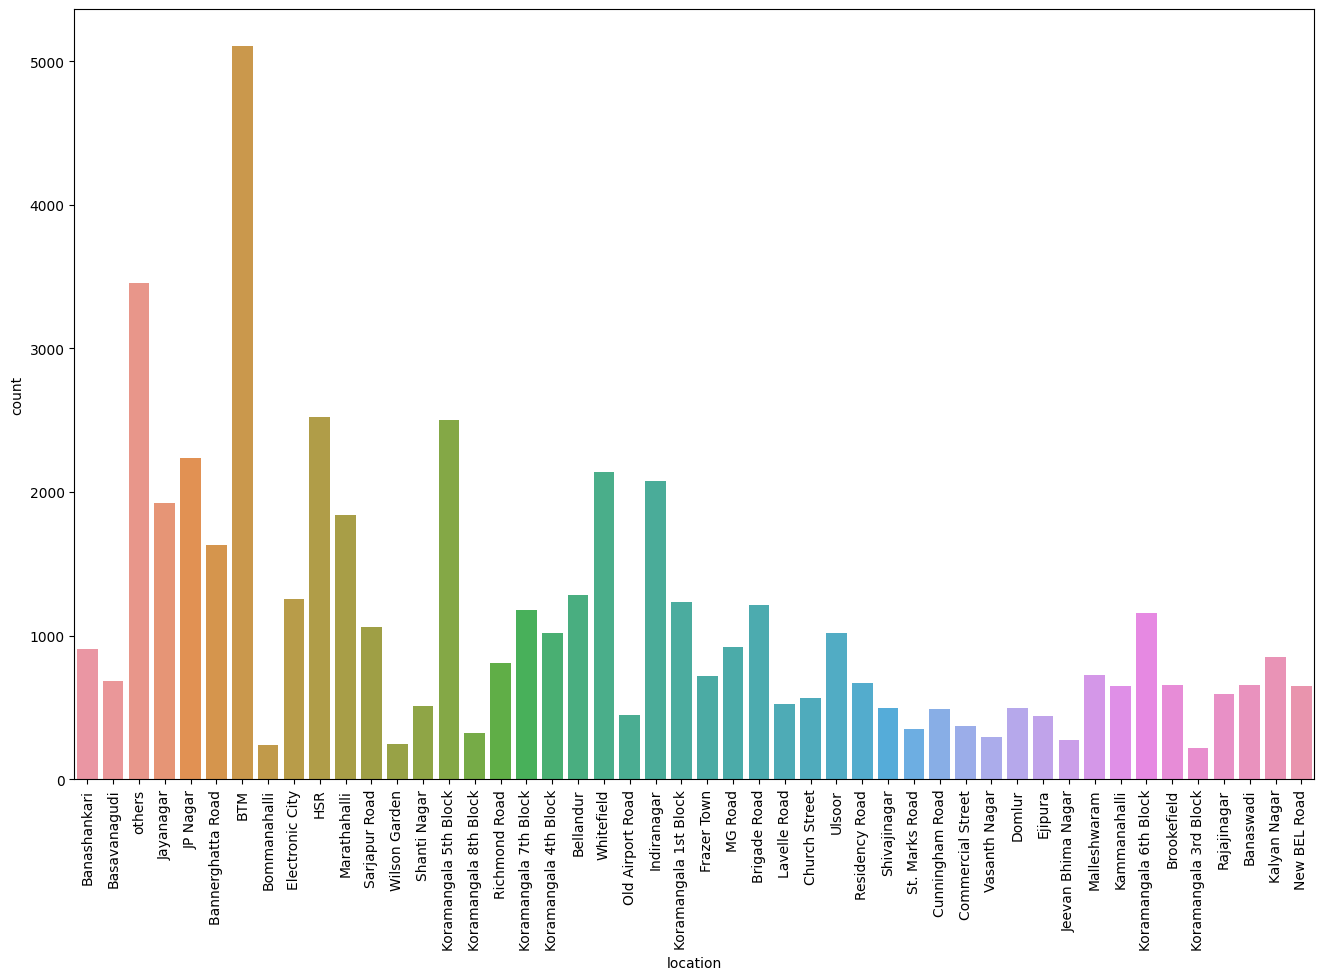

In [43]:
plt.figure(figsize= (16,10))
ax = sns.countplot(x=df['location'])
plt.xticks(rotation=90)

<Axes: xlabel='online_order', ylabel='count'>

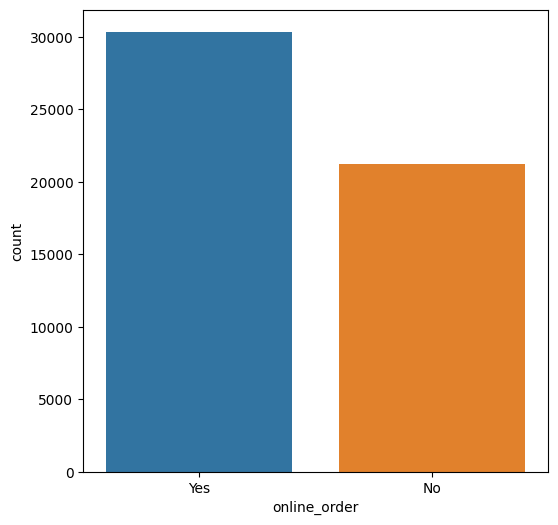

In [44]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['online_order'])

<Axes: xlabel='book_table', ylabel='count'>

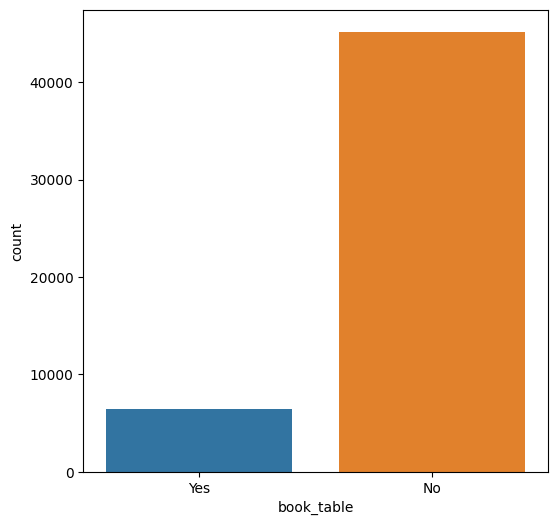

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['book_table'])

<Axes: xlabel='online_order', ylabel='rate'>

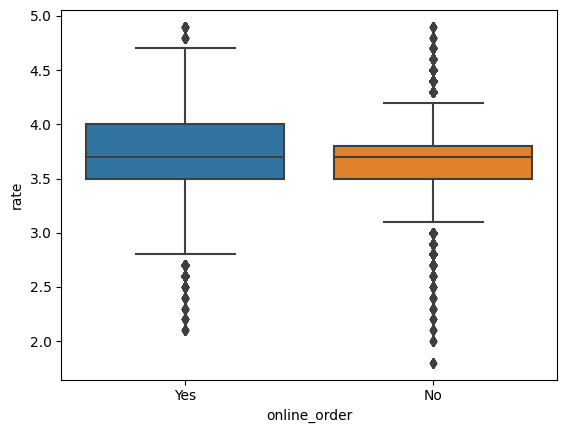

In [46]:
plt.figure()
sns.boxplot(x='online_order',y='rate',data=df)

<Axes: xlabel='book_table', ylabel='rate'>

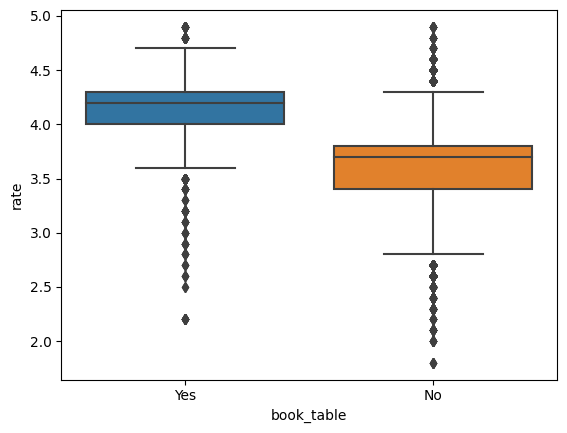

In [47]:
plt.figure()
sns.boxplot(x='book_table',y='rate',data=df)

In [48]:
df1=df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1 =pd.pivot_table(df1,values=None, index=['location'], columns=['online_order'], fill_value=0)

In [49]:
df1

name      
online_order             No   Yes
location                         
BTM                    1789  3320
Banashankari            397   507
Banaswadi               321   338
Bannerghatta Road       704   924
Basavanagudi            243   441
Bellandur               523   760
Bommanahalli            123   115
Brigade Road            552   658
Brookefield             241   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  261   235
Ejipura                 219   219
Electronic City         681   575
Frazer Town             293   427
HSR                     602  1919
Indiranagar             743  1332
JP Nagar                917  1317
Jayanagar               562  1364
Jeevan Bhima Nagar       68   204
Kalyan Nagar            355   498
Kammanahalli            267   380
Koramangala 1st Block   385   852
Koramangala 3rd Block    91   124
Koramangala 4th Block   459   558
Koramangala 5th Block   889  1613
Koramangala 6th Block   457   697
Koramangala 7th Block   394   785
Koramangala 8th Block   108   212
Lavelle Road            321   203
MG Road                 544   373
Malleshwaram            310   412
Marathahalli            734  1109
New BEL Road            257   392
Old Airport Road        230   216
Rajajinagar             286   305
Residency Road          425   247
Richmond Road           565   246
Sarjapur Road           335   728
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          185   167
Ulsoor                  395   622
Vasanth Nagar           148   147
Whitefield             1005  1135
Wilson Garden           112   134
others                 1487  1967

<Axes: xlabel='location'>

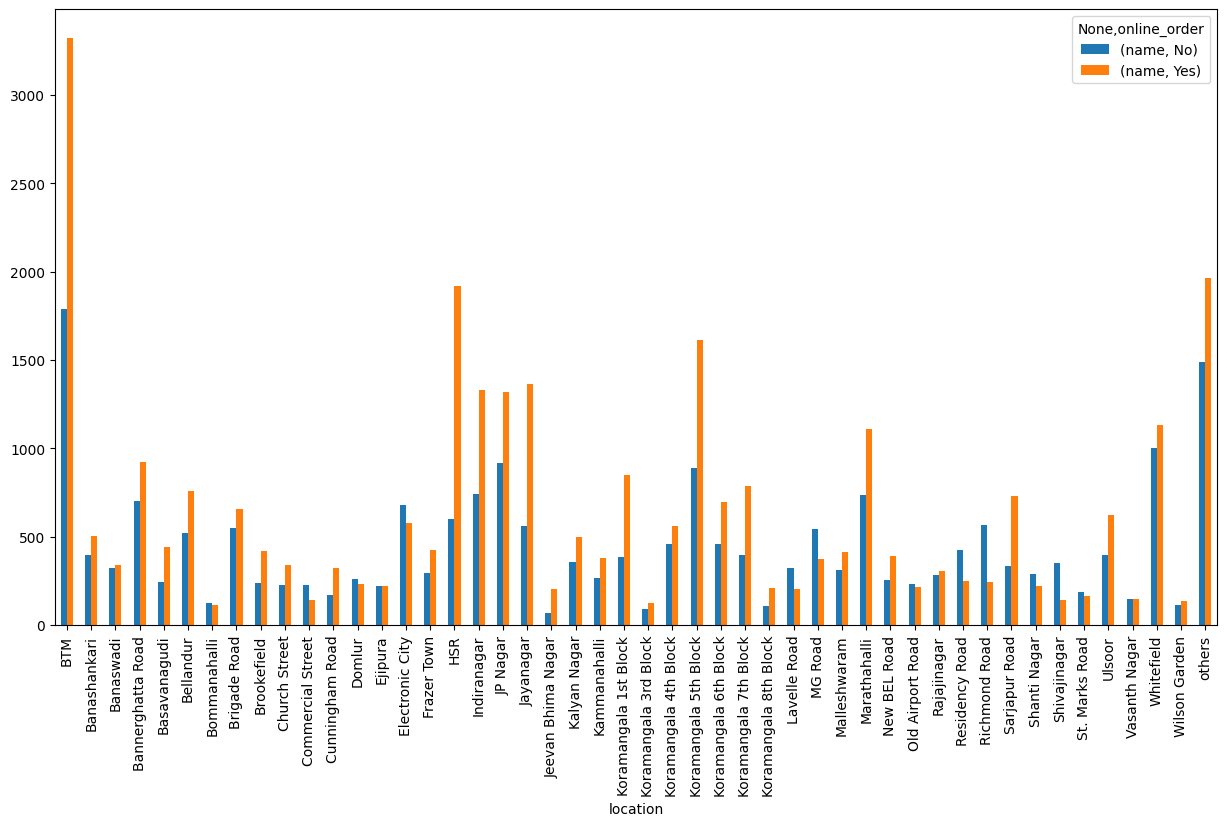

In [50]:
df1.plot(kind='bar', figsize=(15,8))

In [51]:
df2= df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_book_table.csv')
df2=pd.read_csv('location_book_table.csv')
df2=pd.pivot_table(df2,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)

<Axes: xlabel='location'>

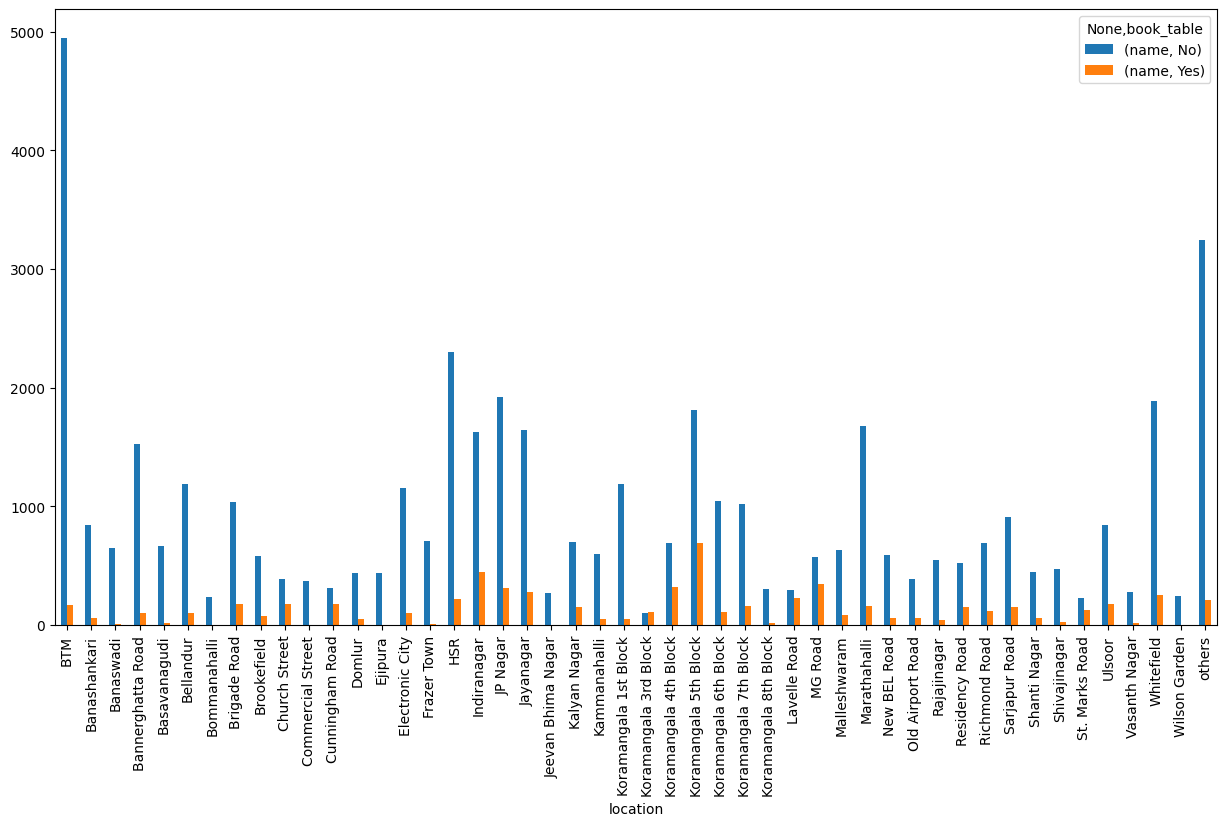

In [52]:
df2.plot(kind='bar',figsize=(15,8))

<Axes: xlabel='type', ylabel='rate'>

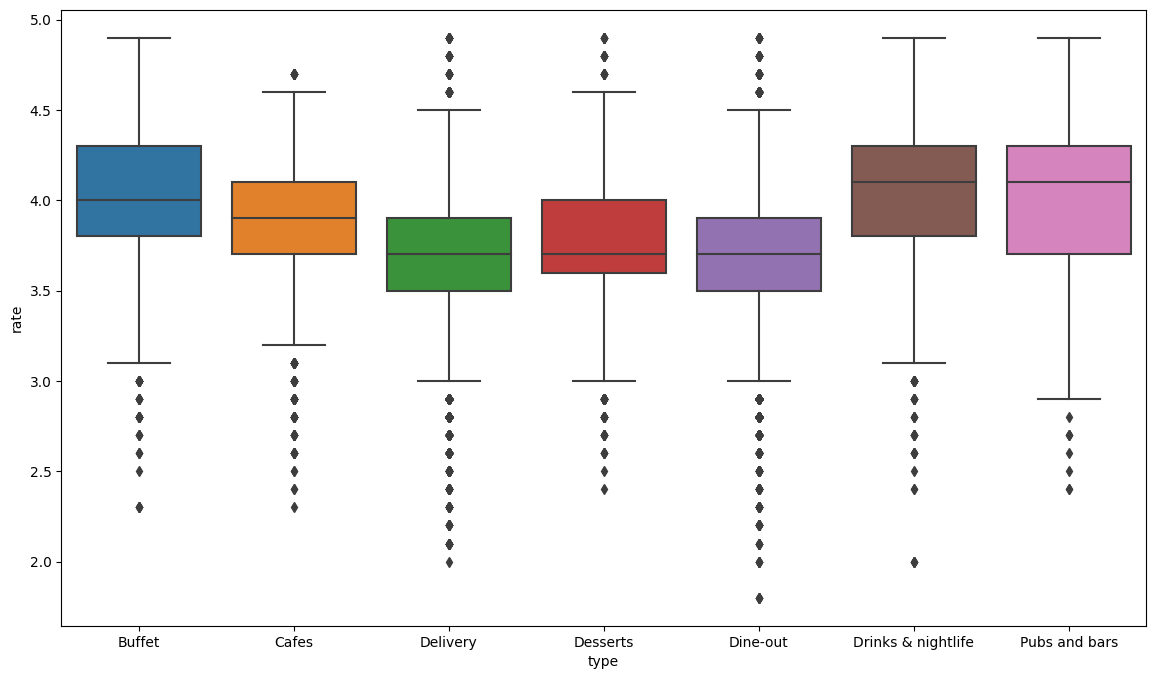

In [53]:
plt.figure(figsize=(14,8))
sns.boxplot(x='type',y='rate',data=df)

In [54]:
df3=df.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,index=['location'],columns=['type'],fill_value=0)
df3

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       25    83     3082      202     1676   
Banashankari               7    36      419       71      357   
Banaswadi                  0    24      320       37      271   
Bannerghatta Road          9    46      842      137      583   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      624       77      485   
Bommanahalli               2     1      145       11       77   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      340       45      246   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    17      261       35      144   
Ejipura                    0     0      250       16      172   
Electronic City           23    24      575       71      521   
Frazer Town                1    11      474       56      174   
HSR                       19    49     1714      123      584   
Indiranagar               38   100     1116      146      540   
JP Nagar                  45    76     1159      166      730   
Jayanagar                 27    77     1049      182      579   
Jeevan Bhima Nagar         0     6      141       18      107   
Kalyan Nagar               9    45      370       88      323   
Kammanahalli               2    27      332       35      245   
Koramangala 1st Block      3    26      717       70      398   
Koramangala 3rd Block     19    20       81       17       65   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   151     1082      210      852   
Koramangala 6th Block     18    43      526       70      423   
Koramangala 7th Block     25    52      508      127      417   
Koramangala 8th Block      0    10      213       28       67   
Lavelle Road              30    27      129       50      193   
MG Road                   51    78      271       73      349   
Malleshwaram              11    31      269       85      292   
Marathahalli              37    32      995      107      643   
New BEL Road               4    29      341       34      225   
Old Airport Road          12     5      204       37      167   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      290   
Richmond Road             63    25      257       78      360   
Sarjapur Road             25    23      565       83      326   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      115       10      150   
Ulsoor                    16    56      462       71      359   
Vasanth Nagar              4    16      152       12      106   
Whitefield                28    51     1064      139      778   
Wilson Garden              3     2      133       19       86   
others                    59    79     1971      176     1072   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Bommanahalli                           1             1  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street           

<Axes: xlabel='location'>

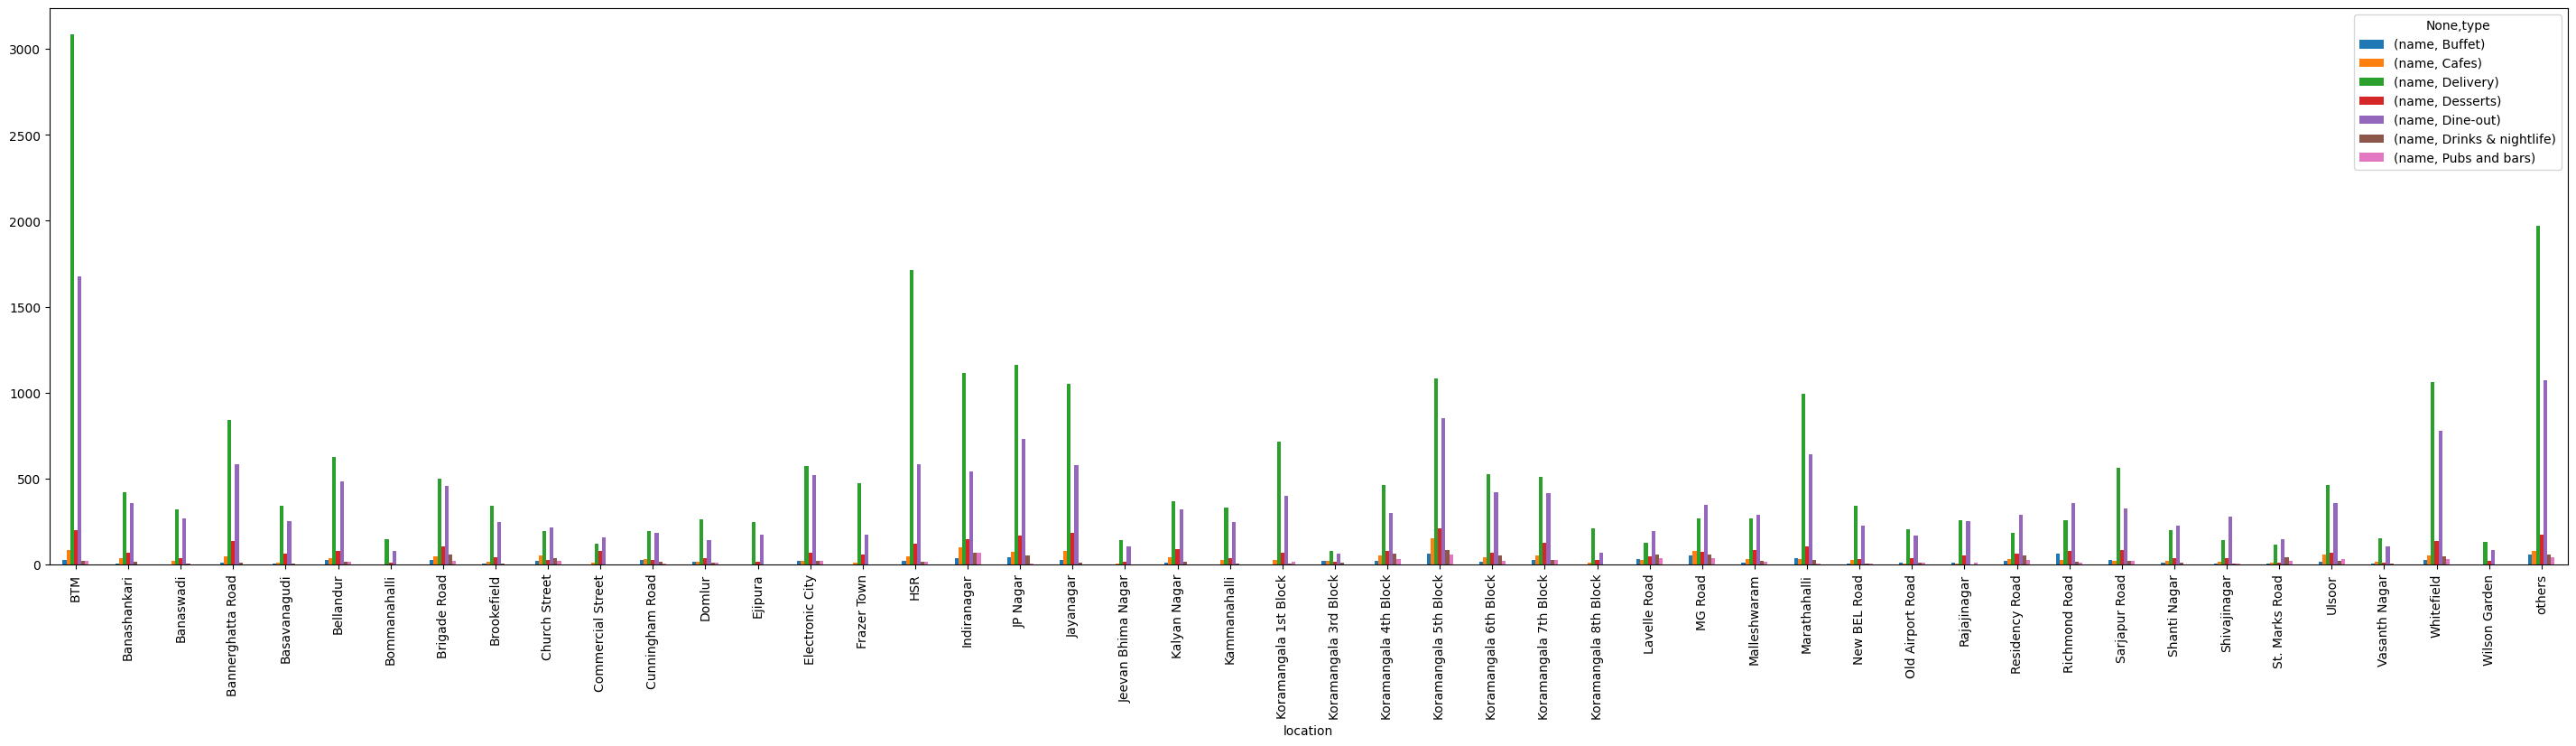

In [55]:
df3.plot(kind='bar',figsize=(36,8))

In [56]:
df4=df[['location','votes']]
df4.drop_duplicates()
df4
df5=df4.groupby(['location'])['votes'].sum()
df5
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2218762
Indiranagar,1188487
Koramangala 4th Block,685156
BTM,618986
Church Street,590306


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'BTM'),
  Text(4, 0, 'Church Street'),
  Text(5, 0, 'JP Nagar'),
  Text(6, 0, 'HSR'),
  Text(7, 0, 'Lavelle Road'),
  Text(8, 0, 'Koramangala 7th Block'),
  Text(9, 0, 'Jayanagar'),
  Text(10, 0, 'Whitefield'),
  Text(11, 0, 'Koramangala 6th Block'),
  Text(12, 0, 'Marathahalli'),
  Text(13, 0, 'MG Road'),
  Text(14, 0, 'Brigade Road'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'others'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text

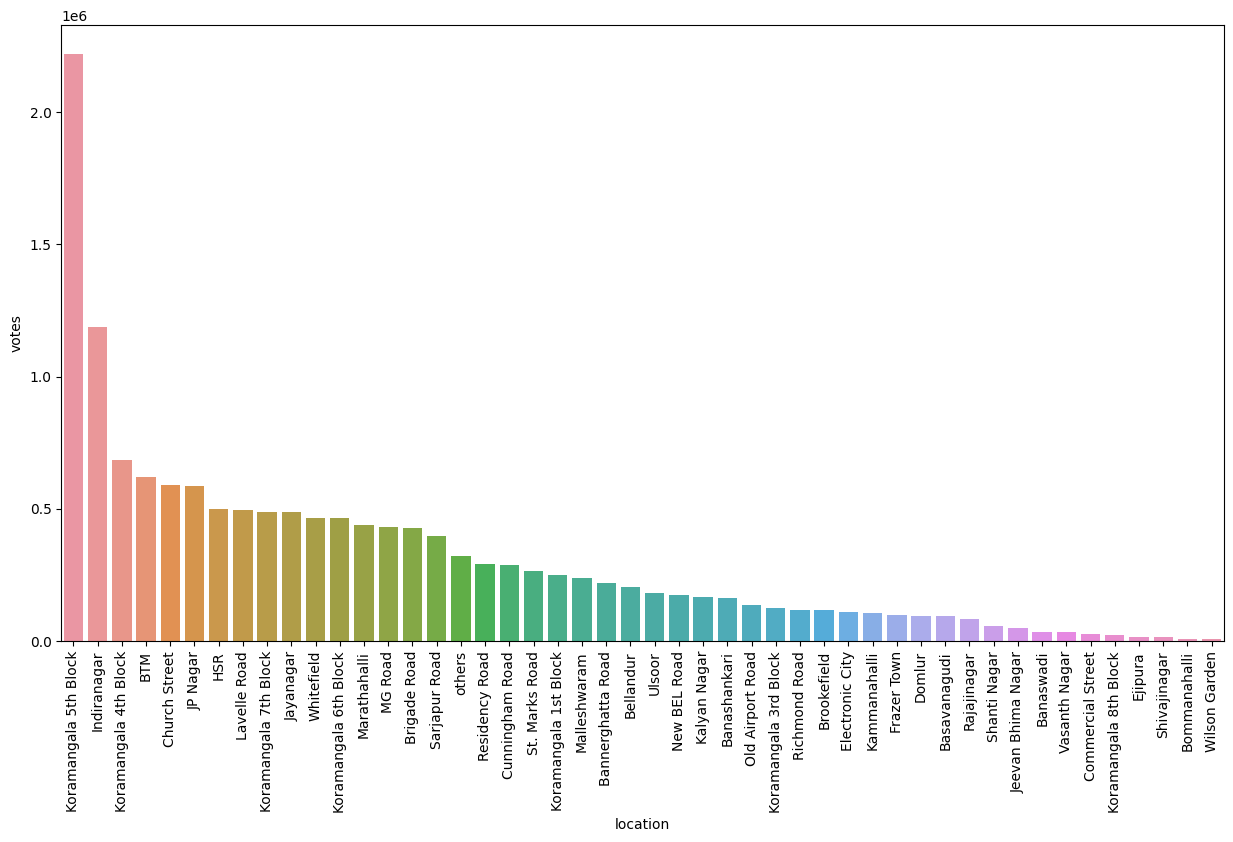

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)

In [58]:
df6=df[['cuisines','votes']]
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7=df7.to_frame()
df7=df7.sort_values('votes',ascending=False)
df7

,votes
cuisines,
others,11573933
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
"North Indian, Mughlai",103706
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",6080


In [59]:
df7=df7.iloc[1:,:]

In [60]:
df7

,votes
cuisines,
North Indian,558618
"North Indian, Chinese",259502
South Indian,161983
"North Indian, Mughlai",103706
Chinese,101728
...,...
"Biryani, South Indian",6473
"Kerala, South Indian",6083
"Fast Food, Beverages",6080


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

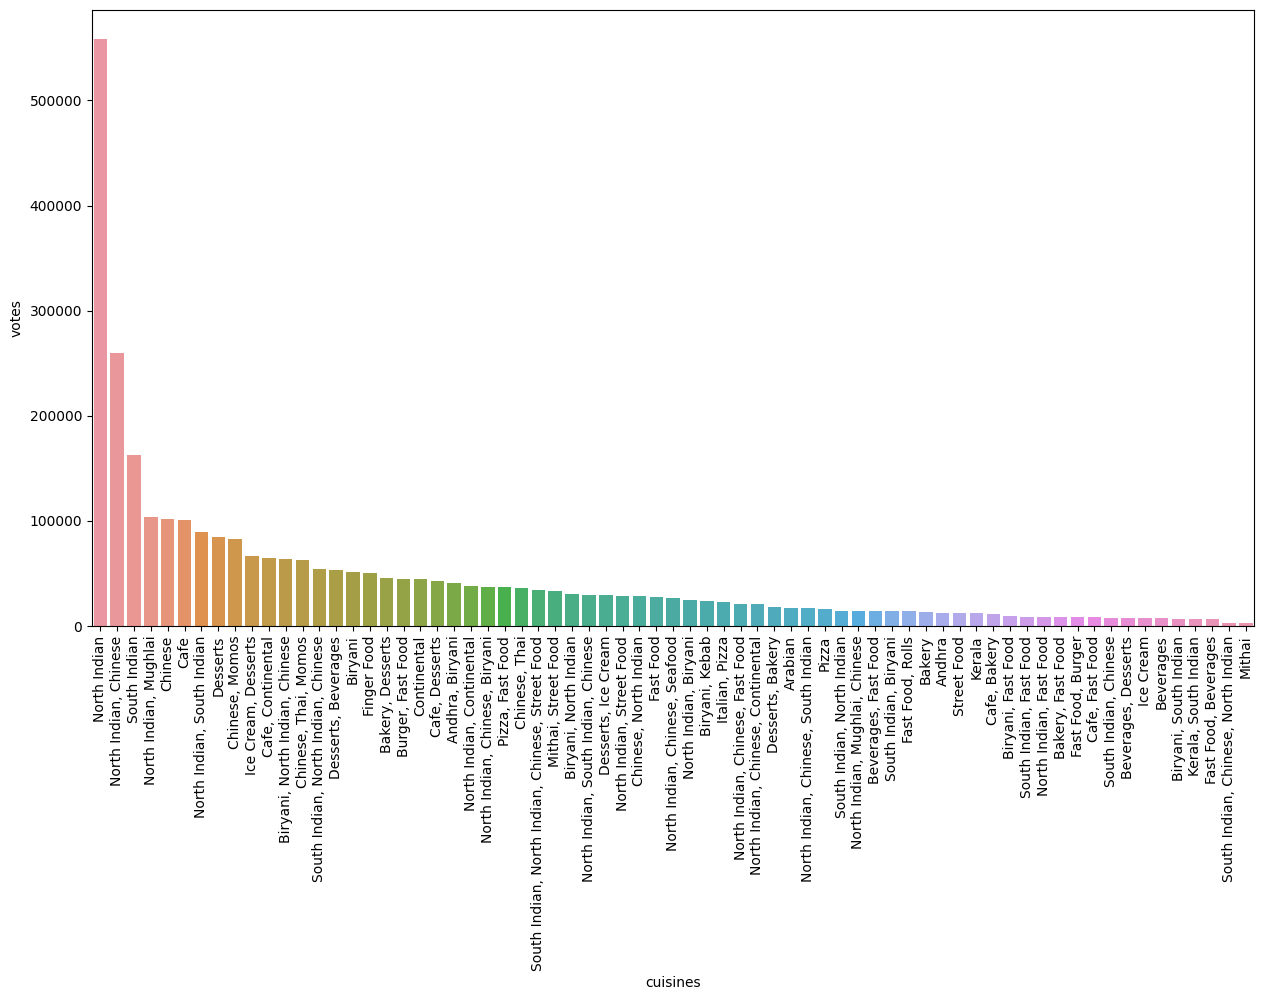

In [65]:
plt.figure(figsize=(15,8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)

In [62]:
df.to_csv('zomato-edited.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

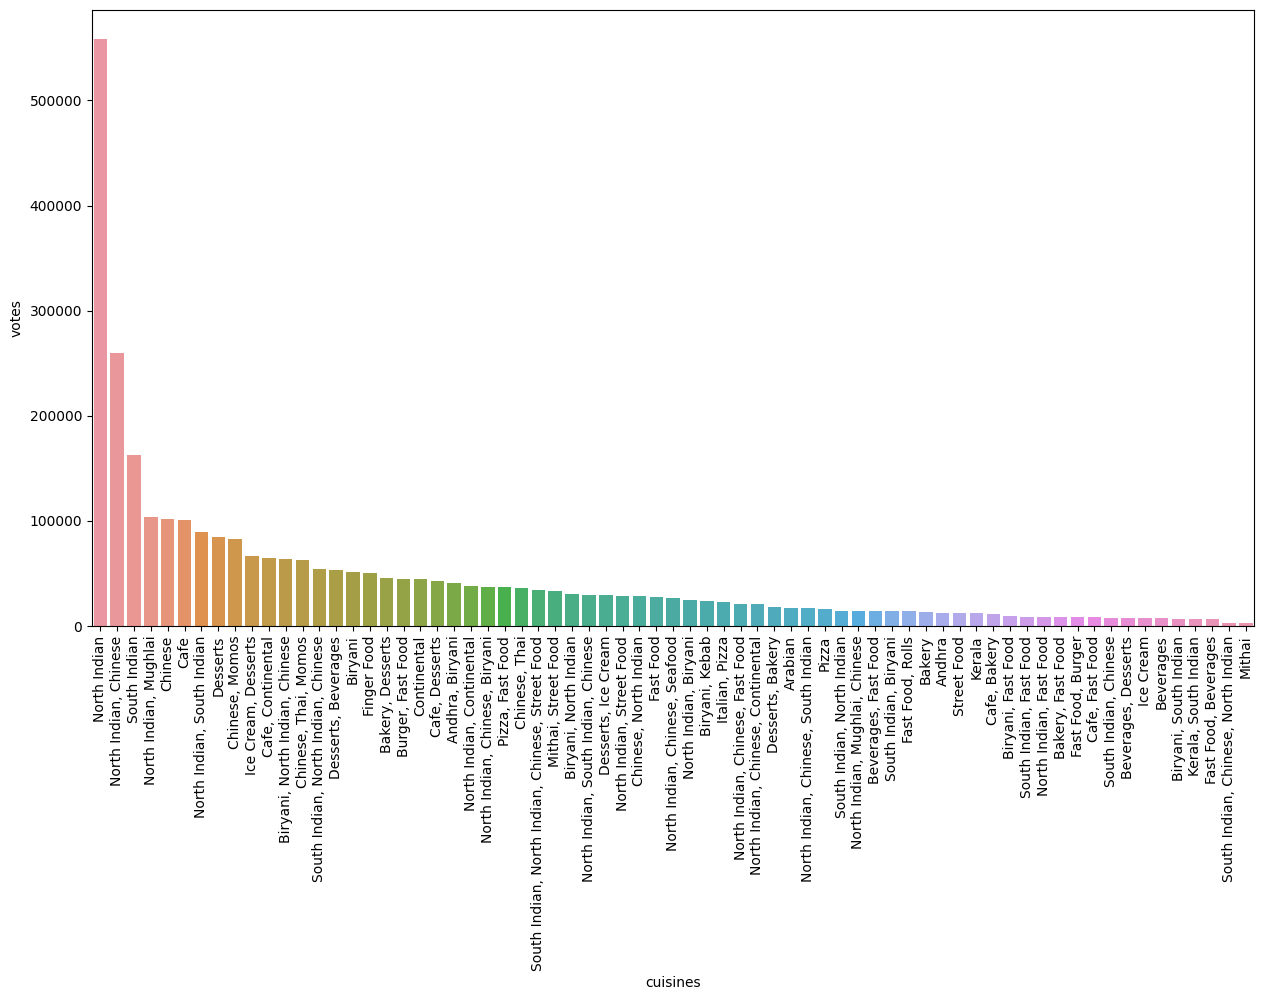

In [66]:
plt.figure(figsize=(15,8))
sns.barplot(x=df7.index, y=df7['votes'])
plt.xticks(rotation=90)